# 1. Konw your Data

### 1. Import Libraries

In [1]:
# Importing necsessary libararies
# Importing numpy and pandas for data processing
import numpy as np
import pandas as pd

# Importing Tools for Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Import word cloud library
from wordcloud import WordCloud, STOPWORDS

# Import library for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import model selection libraries
from sklearn.model_selection import train_test_split

# Libraries used for ML model implementation
from sklearn.naive_bayes import MultinomialNB

# Import pipeline from scikit-learn
from sklearn.pipeline import Pipeline

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Dataset Loading

In [6]:
# Load the Dataset with a different encoding
spam = pd.read_csv("spam.csv", encoding='ISO-8859-1')

### Dataset View

In [7]:
spam.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Dataset Rows and Columns Count

In [8]:
# Dataset rows and columns count
print("Number of rows are: ", spam.shape[0])
print("Number of columns are: ", spam.shape[1])

Number of rows are:  5572
Number of columns are:  5


### Dataset Information

In [9]:
# Dataset info
spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
dup = spam.duplicated().sum()
print("Number of duplicate rows are: ", dup)

Number of duplicate rows are:  403


### Missing values/Null values

In [11]:
# Missing values/Null values
spam.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

##### Things we learn about dataset
The Spam dataset contains various messages and their respective categories. It includes 5572 rows and 5 columns. Within the dataset, there are 403 duplicate rows. The 'v1' and 'v2' columns do not contain any null values, whereas the unnamed columns 2, 3, and 4 have many null values (these three columns will be dropped later).

# 2. Understanding the Variables

In [12]:
# Dataset columns
spam.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [13]:
# Dataset description
spam.describe(include = 'all').round(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Check Unique Values for each variable

In [14]:
# Check Uniques Values for each variable.
for i in spam.columns.tolist():
    print("Number of unique values in", i, "is", spam[i].nunique())

Number of unique values in v1 is 2
Number of unique values in v2 is 5169
Number of unique values in Unnamed: 2 is 43
Number of unique values in Unnamed: 3 is 10
Number of unique values in Unnamed: 4 is 5


# 3. Data Wrangling

In [16]:
# Change v1 and v2 columns as category and Message
spam.rename(columns = {'v1' : 'Category', 'v2' : 'Message'}, inplace = True)

In [17]:
# Removing all unnamed columns
spam.drop(columns = {'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'}, inplace = True)

In [18]:
# Create a binary 'spam' column: 1 for spam and o for ham
spam['Spam'] = spam['Category'].apply(lambda x: 1 if x == 'spam' else 0)

In [19]:
# Updated dataset
spam.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


Here is a refined version of the manipulations performed and the insights gained:
- Renamed 'v1' and 'v2' columns as Category and Message respectively.
- Added a new binary column, 'Spam': 1 for 'spam' and 0 for 'ham', based on the 'Category' column.
- Dropped all the unnamed columns from the DataFrame.

# 4. Data Visualization, Storytelling and Experimenting with charts: Understand the relationships between variables

### Chart 1 - Distribution of Spam vs Ham

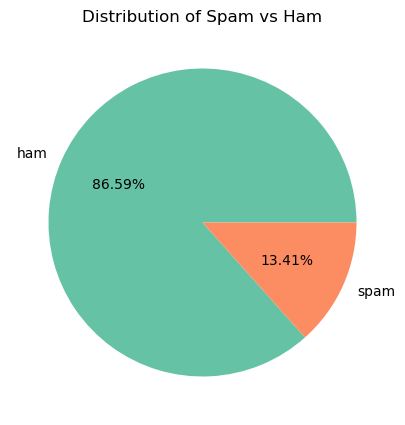

In [26]:
# Chart 1- Distribution of Spam vs Ham Messages
# Data preparation
spread = spam['Category'].value_counts().reset_index()
spread.columns = ['Category', 'Count']

# Plot 
plt.figure(figsize = (5, 5))
plt.pie(spread['Count'], labels = spread['Category'], autopct = '%1.2f%%', colors = sns.color_palette("Set2"))

# Set the Title
plt.title('Distribution of Spam vs Ham')

# Display the chart
plt.show()

### Chart 2 - Most Used Words in Spam Messages

In [27]:
# Splitting Spam Messages
spam_spam = spam[spam["Category"] == 'spam'].copy()



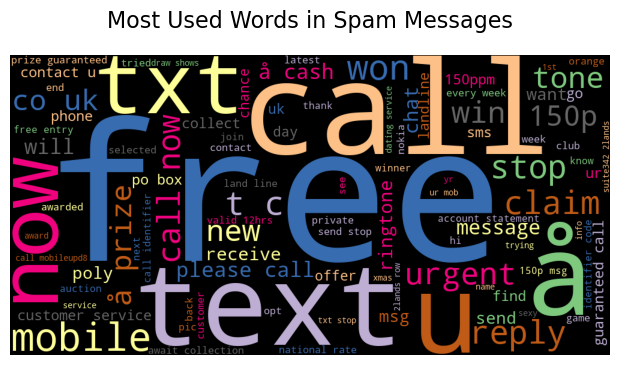

In [65]:
# Chart 2 - WordCloud Plot for Most ued words in Spam Messages
# Create a String to store all the words
cmt_words = ''

# Remove all the stop words
stopwords = set(STOPWORDS)

# Iterate through the column
for val in spam_spam.Message:
    
    # Typecast Each Val to String
    val = str(val)
    
    # Split the value
    tokens = val.split()
    
    # Converts Each Token into Lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    cmt_words += " ".join(tokens)+" "
    
# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                     background_color = 'black',
                     stopwords = stopwords,
                     min_font_size = 8,
                     max_words = 100,
                     colormap = 'Accent').generate(cmt_words)

# Set the labels
plt.figure(figsize = (6, 6), facecolor = None)
plt.title("Most Used Words in Spam Messages", fontsize = 16, pad = 20)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)

# Display the Chart
plt.show()

#### Insights can be drawn from the chart
From the word cloud plot, we can see that the words 'free', 'call', 'text', 'txt', 'reply', 'claim', and 'now' are the most frequently used words in spam messages.

# 5. Feature Engineering and Data Pre-processing

In [66]:
# Split the dataset into train and test set
x_train, x_test, y_train, y_test = train_test_split(spam.Message, spam.Spam, test_size = 0.3)

In [78]:
def evaluate_model(model, x_train, x_test, y_train, y_test):
    '''The function takes a model, x_train, x_test, y_train, and y_test as inputs.
        It fits the model, makes predictions on the training and test sets, and performs the following steps:
        1. Prints the ROC-AUC score for both training and test sets.
        2. Plots the ROC and AUC curves.
        3. Prints the confusion matrix for both training and test sets.
        4. Prints the classification report for both training and test sets.
        5. Plots the feature importances if the model provides them.
        6. Returns a list of the following scores: recall_train, recall_test, acc_train,
        acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test.'''
   
    # Fit the model on the training data
    model.fit(x_train, y_train)
    
    # Make Prediction on the test data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    pred_prob_train = model.predict_proba(x_train)[:, 1]
    pred_prob_test = model.predict_proba(x_test)[:, 1]
    
    # Calculate ROC AUC Curve
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("Train ROC AUC: ", roc_auc_train)
    print("Test Roc Auc: ", roc_auc_test)
    
    # Plot the ROC Curve
    fpr_train, tpr_train, threshold_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, threshold_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1], [0,1],'k--')
    plt.plot(fpr_train, tpr_train, label = 'Train ROC AUC: {:.2f}'.format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label = 'Test ROC AUC: {:.2f}'.format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
    
    # Calculate Confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)
    
    fig,ax = plt.subplots(1, 2, figsize = (11, 4))
    print("Confusion Matrix: ")
    sns.heatmap(cm_train, annot = True, xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'], cmap = 'Blues', fmt = '.4g', ax = ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")
    
    sns.heatmap(cm_test, annot = True, xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'], cmap = 'Blues', fmt = '.4g', ax = ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")
    
    plt.tight_layout()
    plt.show()
    
    # Calculate classifiaction report
    cr_train = classification_report(y_train, y_pred_train, output_dict = True)
    cr_test = classification_report(y_test, y_pred_test, output_dict = True)
    print("Train Classification Report: ")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    print("\nTest Classification Report: ")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    
    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']
    
    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']
    
    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)
    
    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']
    
    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, F1_train, F1_test, roc_auc_train, roc_auc_test]
    return model_score

### Model - Multinomial Naive Bayes

In [76]:
# Model Implementation
# Create a machine learning pipeline using scikit-learn, combining text vectorization
# A Multinomial Naive Bayes classifier for email spam detection
mnb = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])

### Model and its performance

Train ROC AUC:  0.9841638206147473
Test Roc Auc:  0.9587676374174545


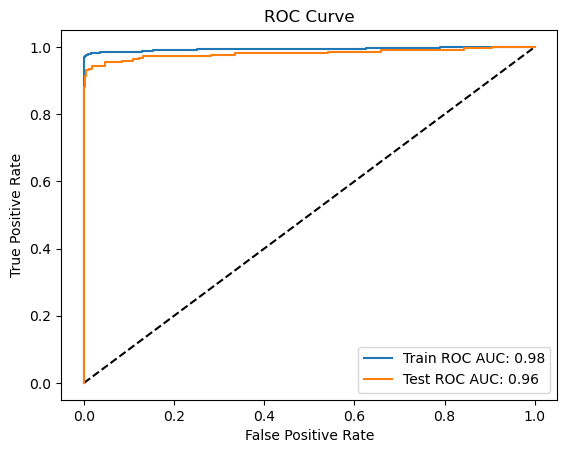

Confusion Matrix: 


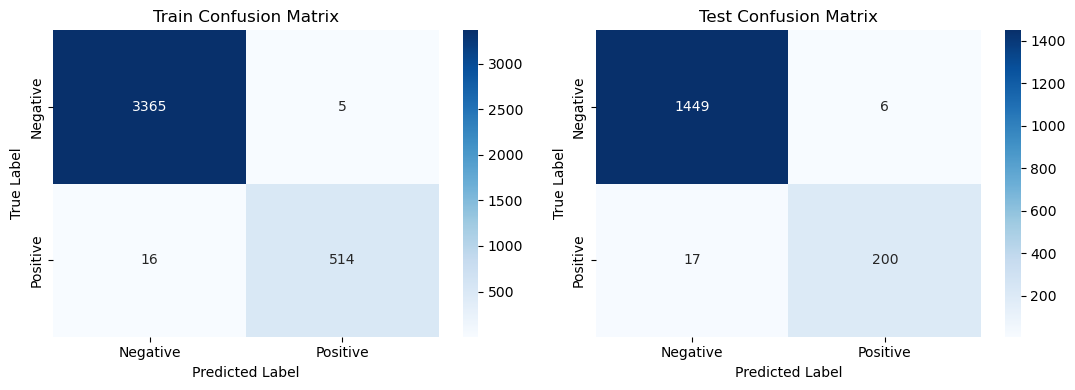

Train Classification Report: 
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.995268 | 0.998516 |   0.996889 | 3370        |
| 1            |    0.990366 | 0.969811 |   0.979981 |  530        |
| accuracy     |    0.994615 | 0.994615 |   0.994615 |    0.994615 |
| macro avg    |    0.992817 | 0.984164 |   0.988435 | 3900        |
| weighted avg |    0.994602 | 0.994615 |   0.994592 | 3900        |

Test Classification Report: 
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0            |    0.988404 | 0.995876 |   0.992126 | 1455        |
| 1            |    0.970874 | 0.921659 |   0.945626 |  217        |
| accuracy     |    0.986244 | 0.986244 |   0.986244 |    0.986244 |
| macro avg    |    0.979639 | 0.958768 |   0.968876 | 1672        |
| weighted avg |    0.986129 | 0.986244 |  

In [79]:
# Visualizing evaluation metric score chart
MultinomialNB_score = evaluate_model(mnb, x_train, x_test, y_train, y_test)

# 7. Email Spam Detection System

In [80]:
# Defining a function for the Email Spam Detection System
def detect_spam(email_text):
    prediction = mnb.predict([email_text])

    if prediction == 0:
        return "This is a Ham Email!"
    else:
        return "This is a Spam Email!"


In [81]:
# Example of how to use the function
sample_email = 'Free Tickets for IPL'
result = detect_spam(sample_email)
print(result)

This is a Spam Email!
